In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import multiprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.neural_network
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

from prettytable import PrettyTable

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("data_traffic.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [46]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [47]:
categories_col = [n for n in df.columns if df[n].dtypes == 'object']
for column in categories_col:
    print(column, '\n')
    print(df[column].value_counts())
    print("------------------------------------------------------------------")

protocoltype 

tcp     121569
udp      17614
icmp      9334
Name: protocoltype, dtype: int64
------------------------------------------------------------------
service 

http         48191
private      26627
domain_u      9937
smtp          8247
ftp_data      7711
             ...  
tftp_u           4
harvest          2
http_8001        2
aol              2
http_2784        1
Name: service, Length: 70, dtype: int64
------------------------------------------------------------------
flag 

SF        89820
S0        36864
REJ       15083
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: flag, dtype: int64
------------------------------------------------------------------
attack 

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan

In [48]:
df['attack']=np.where(df['attack'] =='back', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='land', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='neptune', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='pod', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='smurf', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='teardrop', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='apache2', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='udpstorm', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='processtable', 'dos', df['attack'])
df['attack']=np.where(df['attack'] =='worm', 'dos', df['attack'])

In [49]:
df['attack']=np.where(df['attack'] =='satan', 'probe', df['attack'])
df['attack']=np.where(df['attack'] =='ipsweep', 'probe', df['attack'])
df['attack']=np.where(df['attack'] =='nmap', 'probe', df['attack'])
df['attack']=np.where(df['attack'] =='portsweep', 'probe', df['attack'])
df['attack']=np.where(df['attack'] =='mscan', 'probe', df['attack'])
df['attack']=np.where(df['attack'] =='saint', 'probe', df['attack'])

In [50]:
df['attack']=np.where(df['attack'] =='guess_passwd', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='ftp_write', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='imap', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='phf', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='multihop', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='warezmaster', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='warezclient', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='spy', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='xlock', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='xsnoop', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='snmpguess', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='snmpgetattack', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='httptunnel', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='sendmail', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='named', 'r2l', df['attack'])
df['attack']=np.where(df['attack'] =='mailbomb', 'r2l', df['attack'])

In [51]:
df['attack']=np.where(df['attack'] =='buffer_overflow', 'u2r', df['attack'])
df['attack']=np.where(df['attack'] =='loadmodule', 'u2r', df['attack'])
df['attack']=np.where(df['attack'] =='rootkit', 'u2r', df['attack'])
df['attack']=np.where(df['attack'] =='perl', 'u2r', df['attack'])
df['attack']=np.where(df['attack'] =='sqlattack', 'u2r', df['attack'])
df['attack']=np.where(df['attack'] =='xterm', 'u2r', df['attack'])
df['attack']=np.where(df['attack'] =='ps', 'u2r', df['attack'])

Классификация по 4 группам

In [62]:
df['attack'].value_counts()

normal    77054
dos       53094
probe     14077
r2l        4173
u2r         119
Name: attack, dtype: int64

<AxesSubplot:xlabel='attack', ylabel='count'>

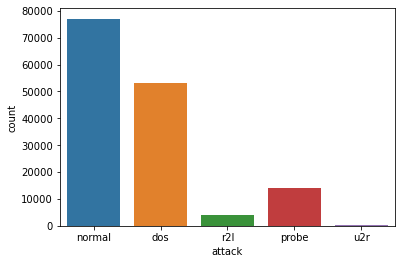

In [52]:
sns.countplot(df['attack'])

In [53]:
encor=LabelEncoder()
df['protocoltype']=encor.fit_transform(df['protocoltype'])
df['service']=encor.fit_transform(df['service'])
df['flag']=encor.fit_transform(df['flag'])

In [54]:
X=df.drop(['attack'],axis=1)
y=df['attack']

In [55]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

SMOTE сбалансируем данные

In [56]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [57]:
y_resampled.value_counts()

probe     77054
r2l       77054
u2r       77054
normal    77054
dos       77054
Name: attack, dtype: int64

In [58]:
X_re_train,X_re_test,y_re_train,y_re_test = train_test_split(X_resampled,y_resampled, test_size = 0.3 , random_state = 0)


In [65]:
def evaluate_model(model, modelname):
    start_time = datetime.now()
    model.fit(X_re_train, y_re_train)
    y_re_pred = model.predict(X_re_test)
    time = datetime.now() - start_time
    print(modelname)
    print("Time execution: ", time)
    #print(confusion_matrix(y_re_test,y_re_pred))
    plot_confusion_matrix(model, X_re_test, y_re_test,cmap=plt.cm.Blues)
    print(classification_report(y_re_test,y_re_pred))

SVM

In [70]:
svc = svm.LinearSVC(random_state=0, loss='squared_hinge', penalty='l1', dual=False,class_weight='balanced')

SVM
Time execution:  0:01:54.426166
              precision    recall  f1-score   support

         dos       0.98      0.97      0.98     23145
      normal       0.98      0.92      0.95     23234
       probe       0.94      0.95      0.94     23206
         r2l       0.85      0.90      0.88     23087
         u2r       0.90      0.90      0.90     22909

    accuracy                           0.93    115581
   macro avg       0.93      0.93      0.93    115581
weighted avg       0.93      0.93      0.93    115581



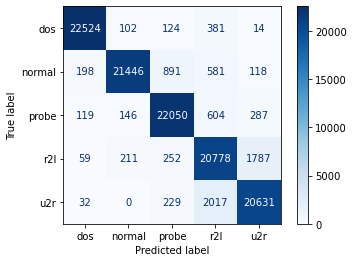

In [71]:
evaluate_model(svc, "SVM")

RandomForest

In [72]:
rf = RandomForestClassifier()

RandomForest
Time execution:  0:01:12.959716
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     23145
      normal       1.00      1.00      1.00     23234
       probe       1.00      1.00      1.00     23206
         r2l       1.00      1.00      1.00     23087
         u2r       1.00      1.00      1.00     22909

    accuracy                           1.00    115581
   macro avg       1.00      1.00      1.00    115581
weighted avg       1.00      1.00      1.00    115581



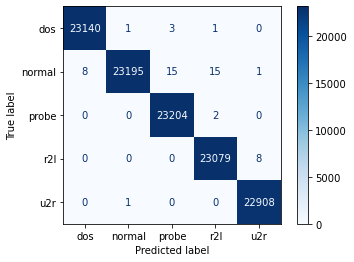

In [73]:
evaluate_model(rf, "RandomForest")

LogisticRegression

In [74]:
lr = LogisticRegression(solver='liblinear', max_iter=100)

LogisticRegression
Time execution:  0:01:49.742411
              precision    recall  f1-score   support

         dos       0.61      0.89      0.73     23145
      normal       0.68      0.73      0.71     23234
       probe       0.28      0.14      0.19     23206
         r2l       0.69      0.59      0.64     23087
         u2r       0.69      0.77      0.73     22909

    accuracy                           0.63    115581
   macro avg       0.59      0.63      0.60    115581
weighted avg       0.59      0.63      0.60    115581



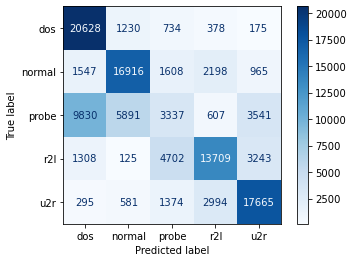

In [75]:
evaluate_model(lr, "LogisticRegression")

AdaBoost

In [76]:
ab = AdaBoostClassifier()

AdaBoost
Time execution:  0:00:56.590421
              precision    recall  f1-score   support

         dos       0.96      0.27      0.43     23145
      normal       0.51      0.87      0.65     23234
       probe       0.89      0.85      0.87     23206
         r2l       0.78      0.77      0.77     23087
         u2r       0.89      0.94      0.92     22909

    accuracy                           0.74    115581
   macro avg       0.81      0.74      0.73    115581
weighted avg       0.80      0.74      0.73    115581



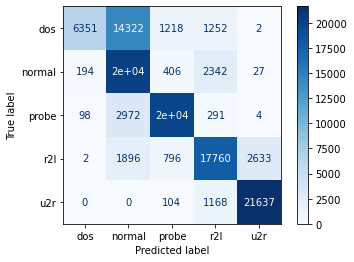

In [77]:
evaluate_model(ab, "AdaBoost")

neural_network

In [78]:
neural = sklearn.neural_network.MLPClassifier()

MLPClassifier
Time execution:  0:00:54.180212
              precision    recall  f1-score   support

         dos       0.97      0.97      0.97     23145
      normal       0.90      0.92      0.91     23234
       probe       0.93      0.94      0.93     23206
         r2l       0.87      0.86      0.86     23087
         u2r       0.93      0.92      0.92     22909

    accuracy                           0.92    115581
   macro avg       0.92      0.92      0.92    115581
weighted avg       0.92      0.92      0.92    115581



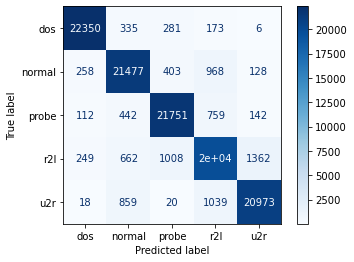

In [79]:
evaluate_model(neural, "MLPClassifier")

KNN

In [80]:
#Не рассматриваем, так как у алгоритм большое время обучения 
#knn = KNeighborsClassifier()
#evaluate_model(knn, "KNN")

Naive Bayes

Naive Bayes
Time execution:  0:00:01.205603
              precision    recall  f1-score   support

         dos       0.24      0.96      0.38     23145
      normal       0.07      0.01      0.01     23234
       probe       0.60      0.06      0.12     23206
         r2l       0.09      0.00      0.00     23087
         u2r       0.69      0.52      0.59     22909

    accuracy                           0.31    115581
   macro avg       0.34      0.31      0.22    115581
weighted avg       0.34      0.31      0.22    115581



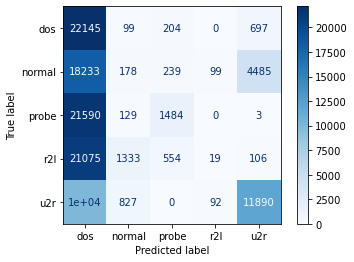

In [81]:
nbc = GaussianNB()
evaluate_model(nbc, "Naive Bayes")